## ALLOFTHEM

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

def print_hi(name):
    # Use a breakpoint in the code line below to debug your script.
    print(f'Hi, {name}')  # Press Ctrl+F8 to toggle the breakpoint.

def ReadExcelSheet(filePath, sheetIndex):
    df = pd.read_excel(filePath, sheet_name=sheetIndex)
    return df

In [3]:
balcova_df = ReadExcelSheet("Files/Son Sipariş Dosyası.xlsx", 0) 
guzelbahce_df = ReadExcelSheet("Files/Son Sipariş Dosyası.xlsx", 1)
mavisehir_df = ReadExcelSheet("Files/Son Sipariş Dosyası.xlsx", 2)
kibris_df = ReadExcelSheet("Files/Son Sipariş Dosyası.xlsx", 3)
kahramanlar_df = ReadExcelSheet("Files/Son Sipariş Dosyası.xlsx", 4)  

In [4]:
balcova_df

,Mağaza Kodu,Mağaza Adı,Mal No,Mal Adı,Kategori,Sipariş Tarihi,Sipariş Miktarı
0,354081000,5M BALÇOVA KİPA AVM,31173393,PAREX MAGİC SÜNGER,NF1,2024-03-03,1
1,354081000,5M BALÇOVA KİPA AVM,31173452,MİGROS PETEK DOKULU RENKLİ SÜNGER,D2,2024-03-03,1
2,354081000,5M BALÇOVA KİPA AVM,31173463,MACROMAX KLASİK YEŞİL OLUKLU SÜNGER 5Lİ,D2,2024-03-03,1
3,354081000,5M BALÇOVA KİPA AVM,31180007,ROLL-UP PUDRALI LATEX ELDİVEN 100LÜ,D2,2024-03-03,1
4,354081000,5M BALÇOVA KİPA AVM,31180036,ROLL-UP PREMIUM TEMZ.ELDİVENİ 8-8.5 MEDI,KOZ,2024-03-03,5
...,...,...,...,...,...,...,...
13620,354081000,5M BALÇOVA KİPA AVM,5039324,ARBELLA KALEM KESME 500G,B1,2024-03-29,1
13621,354081000,5M BALÇOVA KİPA AVM,5039598,NUHUN ANKARA TAM BUĞDAY PENNE MAKARNA 50,B1,2024-03-29,2
13622,354081000,5M BALÇOVA KİPA AVM,5039624,BARILLA CAPELLINI İNCE SPAGHETTI 500 G,B1,2024-03-29,1
13623,354081000,5M BALÇOVA KİPA AVM,8059119,TAMEK %100 PORTAKAL SUYU 1 LT,B1,2024-03-29,1


In [5]:
all_shops = pd.concat([balcova_df, guzelbahce_df, mavisehir_df, kibris_df, kahramanlar_df], ignore_index=True)

In [6]:
# all_shops['Sipariş Tarihi'] = all_shops['Sipariş Tarihi'].dt.strftime('%d')

In [7]:
all_shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35121 entries, 0 to 35120
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Mağaza Kodu      35121 non-null  int64         
 1   Mağaza Adı       35121 non-null  object        
 2   Mal No           35121 non-null  int64         
 3   Mal Adı          35121 non-null  object        
 4   Kategori         35121 non-null  object        
 5   Sipariş Tarihi   35121 non-null  datetime64[ns]
 6   Sipariş Miktarı  35121 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.9+ MB


In [8]:
all_shops.head(3)

,Mağaza Kodu,Mağaza Adı,Mal No,Mal Adı,Kategori,Sipariş Tarihi,Sipariş Miktarı
0,354081000,5M BALÇOVA KİPA AVM,31173393,PAREX MAGİC SÜNGER,NF1,2024-03-03,1
1,354081000,5M BALÇOVA KİPA AVM,31173452,MİGROS PETEK DOKULU RENKLİ SÜNGER,D2,2024-03-03,1
2,354081000,5M BALÇOVA KİPA AVM,31173463,MACROMAX KLASİK YEŞİL OLUKLU SÜNGER 5Lİ,D2,2024-03-03,1


In [9]:
# mağazqa koduna göre grupla 
filtered_by_shop = all_shops.groupby(["Mağaza Kodu"])[["Mal No","Kategori"]].value_counts().sort_values(ascending=False).reset_index()
filtered_by_shop

,Mağaza Kodu,Mal No,Kategori,count
0,354025900,9024352,GD1,16
1,354081000,3311996,B1,16
2,354081000,8060190,GD1,16
3,354081000,8060128,GD1,15
4,354025900,5030209,B1,15
...,...,...,...,...
9705,354025900,5048587,GD2,1
9706,354025900,5044802,GD2,1
9707,354025900,5043012,GD2,1
9708,354025900,5041136,NF1,1


<Axes: xlabel='Sipariş Tarihi'>

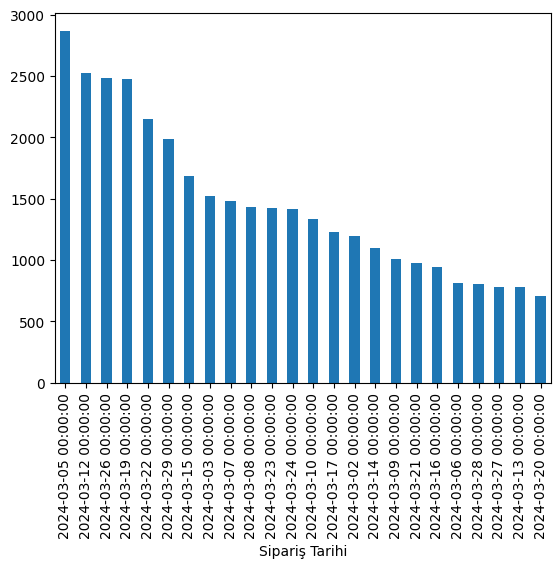

In [10]:
all_shops["Sipariş Tarihi"].value_counts().plot(kind="bar")

In [11]:
## bir ayda hangi günde ne kadar sipariş verilmiş ? 
all_shops["Sipariş Tarihi"].value_counts(), len(all_shops["Sipariş Tarihi"].value_counts())

(Sipariş Tarihi
 2024-03-05    2870
 2024-03-12    2525
 2024-03-26    2483
 2024-03-19    2474
 2024-03-22    2147
 2024-03-29    1989
 2024-03-15    1688
 2024-03-03    1525
 2024-03-07    1481
 2024-03-08    1435
 2024-03-23    1424
 2024-03-24    1419
 2024-03-10    1330
 2024-03-17    1227
 2024-03-02    1196
 2024-03-14    1100
 2024-03-09    1004
 2024-03-21     978
 2024-03-16     943
 2024-03-06     813
 2024-03-28     807
 2024-03-27     778
 2024-03-13     778
 2024-03-20     707
 Name: count, dtype: int64,
 24)

In [12]:
all_shops["Sipariş Tarihi"].value_counts().mean(), all_shops["Sipariş Tarihi"].value_counts().median()

(1463.375, 1374.5)

In [13]:
## 6'lı günlere göre gruplayalım verisetini
all_shops['Grup'] = pd.cut(all_shops['Sipariş Tarihi'].dt.day, bins=range(0, 31, 6), labels=['0-6', '6-12', '12-18', '18-24', '24-30'])


In [14]:
all_shops["Mağaza Kodu"].unique() # 5 mağaza bulunmakta

array([354081000, 354025900, 354050200, 354194100, 354521700])

In [15]:
all_shops["Mağaza Adı"].unique()

array(['5M BALÇOVA KİPA AVM', 'GÜZELBAHÇE İZMİR MM MIGROS',
       'PARK MAVİŞEHİR MMM MİGROS', 'KIBRIS ŞEHİT.İZMİR M MİGROS',
       'MJET KAHRAMANLAR İZMİR'], dtype=object)

In [16]:
all_shops.groupby(["Mağaza Kodu"])[["Mağaza Adı"]].value_counts().reset_index() ## 5 farklı mağazaya ait farklı siparişler bulunmaktadır

,Mağaza Kodu,Mağaza Adı,count
0,354025900,GÜZELBAHÇE İZMİR MM MIGROS,7888
1,354050200,PARK MAVİŞEHİR MMM MİGROS,8457
2,354081000,5M BALÇOVA KİPA AVM,13625
3,354194100,KIBRIS ŞEHİT.İZMİR M MİGROS,3121
4,354521700,MJET KAHRAMANLAR İZMİR,2030


In [17]:
magaza = {"5M BALÇOVA KİPA AVM":354081000,
          "GÜZELBAHÇE İZMİR MM MIGROS": 354025900,
          "PARK MAVİŞEHİR MMM MİGROS":354050200,
          "KIBRIS ŞEHİT.İZMİR M MİGROS":354194100,
          "MJET KAHRAMANLAR İZMİR": 354521700}

In [18]:
filtered_group = all_shops.groupby(["Grup"])[["Mağaza Kodu"]].value_counts().reset_index()
filtered_group

/tmp/ipykernel_91841/1356690254.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_group = all_shops.groupby(["Grup"])[["Mağaza Kodu"]].value_counts().reset_index()


,Grup,Mağaza Kodu,count
0,0-6,354081000,2813
1,0-6,354050200,1404
2,0-6,354025900,1298
3,0-6,354194100,518
4,0-6,354521700,371
5,6-12,354081000,2586
6,6-12,354050200,2054
7,6-12,354025900,2020
8,6-12,354194100,760
9,6-12,354521700,355


In [19]:
all_shops.groupby(["Grup"])[["Mağaza Kodu","Mağaza Adı"]].agg({"Mağaza Kodu": "count"}) 

/tmp/ipykernel_91841/1099540848.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_shops.groupby(["Grup"])[["Mağaza Kodu","Mağaza Adı"]].agg({"Mağaza Kodu": "count"})


,Mağaza Kodu
Grup,
0-6,6404
6-12,7775
12-18,5736
18-24,9149
24-30,6057


/tmp/ipykernel_91841/2710741460.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_group = all_shops.groupby(["Grup"])[["Mağaza Kodu","Mağaza Adı"]].agg({"Mağaza Kodu": "count"})


<Axes: xlabel='Grup'>

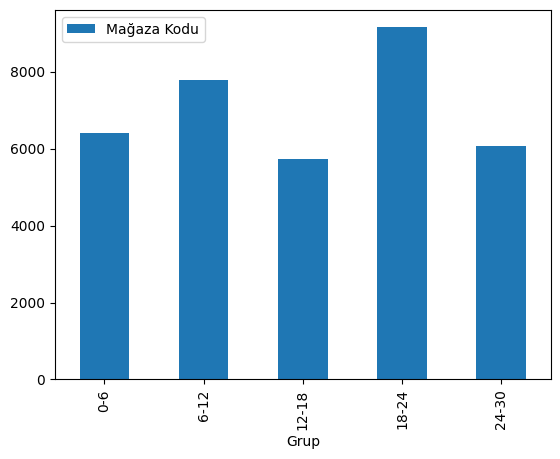

In [20]:
## grafiğe bakacak olursak siparişler eşit dağılmış
filtered_group = all_shops.groupby(["Grup"])[["Mağaza Kodu","Mağaza Adı"]].agg({"Mağaza Kodu": "count"}) 
filtered_group.plot(kind="bar")

In [21]:
## Şimdi elimizde bulunan gruplara ve tarihlere göre göre şirketlerin siparişlerine bakalım

magaza_1 = all_shops[all_shops["Mağaza Kodu"]==magaza["5M BALÇOVA KİPA AVM"]].groupby(['Kategori', 'Sipariş Tarihi'])['Mal Adı'].apply(list).reset_index()
magaza_2 = all_shops[all_shops["Mağaza Kodu"]==magaza["GÜZELBAHÇE İZMİR MM MIGROS"]].groupby(['Kategori', 'Sipariş Tarihi'])['Mal Adı'].apply(list).reset_index()
magaza_3 = all_shops[all_shops["Mağaza Kodu"]==magaza["PARK MAVİŞEHİR MMM MİGROS"]].groupby(['Kategori', 'Sipariş Tarihi'])['Mal Adı'].apply(list).reset_index()
magaza_4 = all_shops[all_shops["Mağaza Kodu"]==magaza["KIBRIS ŞEHİT.İZMİR M MİGROS"]].groupby(['Kategori', 'Sipariş Tarihi'])['Mal Adı'].apply(list).reset_index()
magaza_5 = all_shops[all_shops["Mağaza Kodu"]==magaza["MJET KAHRAMANLAR İZMİR"]].groupby(['Kategori', 'Sipariş Tarihi'])['Mal Adı'].apply(list).reset_index()


In [22]:
all_magaza = all_shops.groupby(["Mağaza Kodu",'Kategori', 'Sipariş Tarihi'])['Mal Adı'].apply(list).reset_index()

In [23]:
swapped_dict = {v: k for k, v in magaza.items()}
all_magaza["Mağaza Adı"] = all_magaza["Mağaza Kodu"].map(swapped_dict)

mal_ad_no_dict = {k:v for index,(k,v) in all_shops[["Mal Adı","Mal No"]].drop_duplicates().reset_index(drop=True).iterrows()}
all_magaza["Mal No"] = all_magaza["Mal Adı"].apply(lambda x: [mal_ad_no_dict[i] for i in x if mal_ad_no_dict[i]])
all_magaza = all_magaza[['Mağaza Kodu','Mağaza Adı', 'Kategori', 'Sipariş Tarihi', 'Mal Adı', 'Mal No']]

### Sonuç olarak elimizde 5 mağaza için kategori ve tarih kırılımında yapılan siparişlerin bulunduğu bir dataframe oluştu 

In [24]:
all_magaza

,Mağaza Kodu,Mağaza Adı,Kategori,Sipariş Tarihi,Mal Adı,Mal No
0,354025900,GÜZELBAHÇE İZMİR MM MIGROS,B1,2024-03-02,"[MİGROS BALDO PİRİNÇ 1KG, MİGROS DERMASON KURU FASULYE 1 KG, IRMAK KÜP ŞEKER 750 G, MİGROS AYÇİÇEK YAĞI 2L, SÖKE UN 1 KG., MUTLU İNCE UZUN MAKARNA 500 G, VERONELLİ ROMANO MAKARNA 160 G, FİLİZ SPAGETTI ÇUBUK MAKARNA 500 G, PASTAVİLLA MANTI 500G, GESAŞ TAHİN 350 G, MİGROS PUDRA ŞEKERİ 250G, TORKU FINDIK EZMESİ 370 G, JUSS SLIM %100 VİŞNE-ELMA MEYVE SUYU 200, PINAR SÜT 6*200 ML, MİGROS % 3 YAĞLI UHT İÇME SÜTÜ 200 ML, İÇİM RAHAT LAKTOZSUZ SÜT 500 ML, PINAR KİDO KAKAOLU SÜT 180 ML, DISNEY KAKAOLU SÜT 6X180 ML., PINAR LAKTOZSUZ PROTEİNLİ KAKAOLU SÜT 50, PINAR ORGANİK SÜT 1 L, TAT OSMANCIK PİRİNÇ 2 KG, TORKU UHT SÜT 1 L, MİGROS NOHUT 1 KG, DOYUM ORGANİK YEŞİL MERCİMEK 1 KG, MİGROS YEŞİL MERCİMEK 1KG, MİGROS KÖFTELİK BULGUR 1 KG, MİGROS AYÇİÇEK YAĞI 1L, NUH ANKARA MANTI MAKARNA 500 G, BARILLA CONCHIGLIE MİNİ MİDYE 500 G, PASTAVİLLA TEL ŞEHRİYE 500G, BARILLA PIPE RIGATE MANTI 500 G, SARELLE DUO SÜTLÜ KAKAOLU FINDIK KREMASI, TAMEK LİMO TROPİK MEYVELİ LİMONATA 200 M, MALTANA MOCKTAIL PINA COLADA ALK.MAL İÇE, İÇİM RAHAT LAKTOZSUZ SÜT 1 L, İÇİM İÇİMİNO ÇİKOLATALI SÜT 6X180 ML, DISNEY ÇİLEKLİ SÜT 6X180 ML, İÇİM YARIM YAĞLI SÜT 1L, PINAR LAKTOZSUZ PROTEİNLİ VANİLYALI SÜT, İÇİM LIGHT SÜT 1 LT, TAT ACI KETÇAP 650 G, UZMAN KASAP DEMI GLACE SOS 175 G, UZMAN KASAP KÖFTE SOS 190G, MİGROS JASMINE PİRİNÇ 1 KG, PASTAVİLLA İRİ ARPA ŞEHRİYE 500 G, MİGROS BURGU MAKARNA 500 G, NUH ANKARA MİNİ PENNE MAKARNA 500 G, NUH ANKARA KELEBEK MAKARNA 500 G, MLIFE BIO ORGANİK YULAF EZMESİ 500 G, BİLLUR TUZ SALAMURA TUZU 3 KG, KOSKA SADE HELVA PAKET 500 G, ULUDAĞ EFSANE LİGHT SADE GAZOZ 1 L, MİGROS VİŞNE NEKTARI 1L, CALVE İKİLİ SET KETÇAP 430 G + MAYONEZ 3, PINAR LAKTOZSUZ SÜT 500 ML, İÇİM FİT SÜT VANİLYALI 500 ML, İÇİM SÜT 6X200 ML, PINAR SÜT KAKAOLU 6*180, NESQUIK KAKAOLU SÜT 6X180ML, İÇİM İÇİMİNO LAKTOZSUZ KAKAOLU SÜT 180 M, UZMAN KASAP GRAVY SOS 175G, HASATA GÖNEN BALDO PİRİNÇ 2 KG, DOYUM ORGANİK PİRİNÇ 1 KG, YUDUM EGEMDEN SIZMA ZEYTİNYAĞI YUMUŞAK L, NUDO SADE KIVIRCIK SOFRA ERİŞTE 300 G, MİGROS İRMİK 500 G, NUH ANKARA SPAGETTİ MAKARNA 500 G, BARILLA FUSULLI BURGU 500 G, BARILLA GNOCHETTI D.KABUĞU 500 G, BARILLA SPAGETTI 500 G, FİLİZ BURGU MAKARNA 500 G, FİLİZ YASSI SPAGETTI MAKARNA 500 G, FİLİZ KELEBEK MAKARNA 500 G, MİGROS ÜZÜM SİRKESİ 750 ML, FİSKOBİRLİK NUGA KAKAOLU FINDIK KREMASI, MİGROS YERFISTIĞI EZMESİ 350 G, MALTANA ANANAS ALKOLSÜZ MAL İÇECEK 250 M, MALTANA MOCKTAIL MOJİTO ALKOLSÜZ MAL İÇE, ULUDAĞ SIFIR KALORİ TONİK 1 L, YAYLA NOHUTLU PİLAV 250 G, MİGROS BEYAZ SİRKE 1L, PINAR EKSTRA LIGHT SÜT 1 L, PINAR ÇOCUK DEVAM SÜTÜ 1 LT, İÇİM SÜT 1 L]","[1011179, 1020001, 3312872, 4110119, 5010401, 5030069, 5030250, 5030356, 5030701, 7080426, 7110327, 7155855, 8050319, 11010029, 11011522, 11013000, 11014072, 11014115, 11015050, 11019001, 1010179, 11019904, 1049977, 1050006, 1059960, 1089949, 4110118, 5030201, 5030346, 5030706, 5039551, 7155805, 8020030, 8038961, 11010066, 11010242, 11014119, 11014567, 11015051, 11019978, 16290753, 9025359, 9025360, 1010088, 5030168, 5030185, 5030209, 5030218, 5090032, 6021106, 7080020, 8035151, 8055261, 9020003, 11010060, 11011904, 11013029, 11014075, 11014322, 11015572, 9025357, 1011909, 1010145, 4130017, 5030167, 5030188, 5030208, 5030340, 5030341, 5030344, 5030352, 5030363, 5030364, 6035128, 7155883, 7155894, 8038959, 8038960, 8038963, 9024294, 9035762, 11010034, 11010408, 11013025]"
1,354025900,GÜZELBAHÇE İZMİR MM MIGROS,B1,2024-03-03,"[MİGROS ELMA DOĞAL ZENGİN MİNERALLİ İÇECE, MİGROS MAYONEZ 220 G, S.S.TİRE ORGANİK KURU FASULYE 1 KG, PINAR SÜT 6*200 ML, MİGROS % 3 YAĞLI UHT İÇME SÜTÜ 200 ML, HEINZ KETÇAP 700G, YAYLA DERMASON FASULYE 1 KG, IRMAK KÜP ŞEKER 750 G, IRMAK KÜP ŞEKER 1 KG, SÖKE UN 1 KG., NUH ANKARA FİYONK 500 G, BARILLA PENNETTE KALEM 500 G, BARILLA LINGUINE YASSI SPAGETTİ MAKARNA, FİLİZ SPAGETTI ÇUBUK MAKARNA 500 G, HEINZ BARBEKÜ SOS 250 G, MİGROS TAHİN 470 G+ PEKMEZ 600 G 2Lİ PAK, NUTELLA 750 G, YAYLA

In [25]:
len(all_magaza["Mal No"].to_list()[1])

107

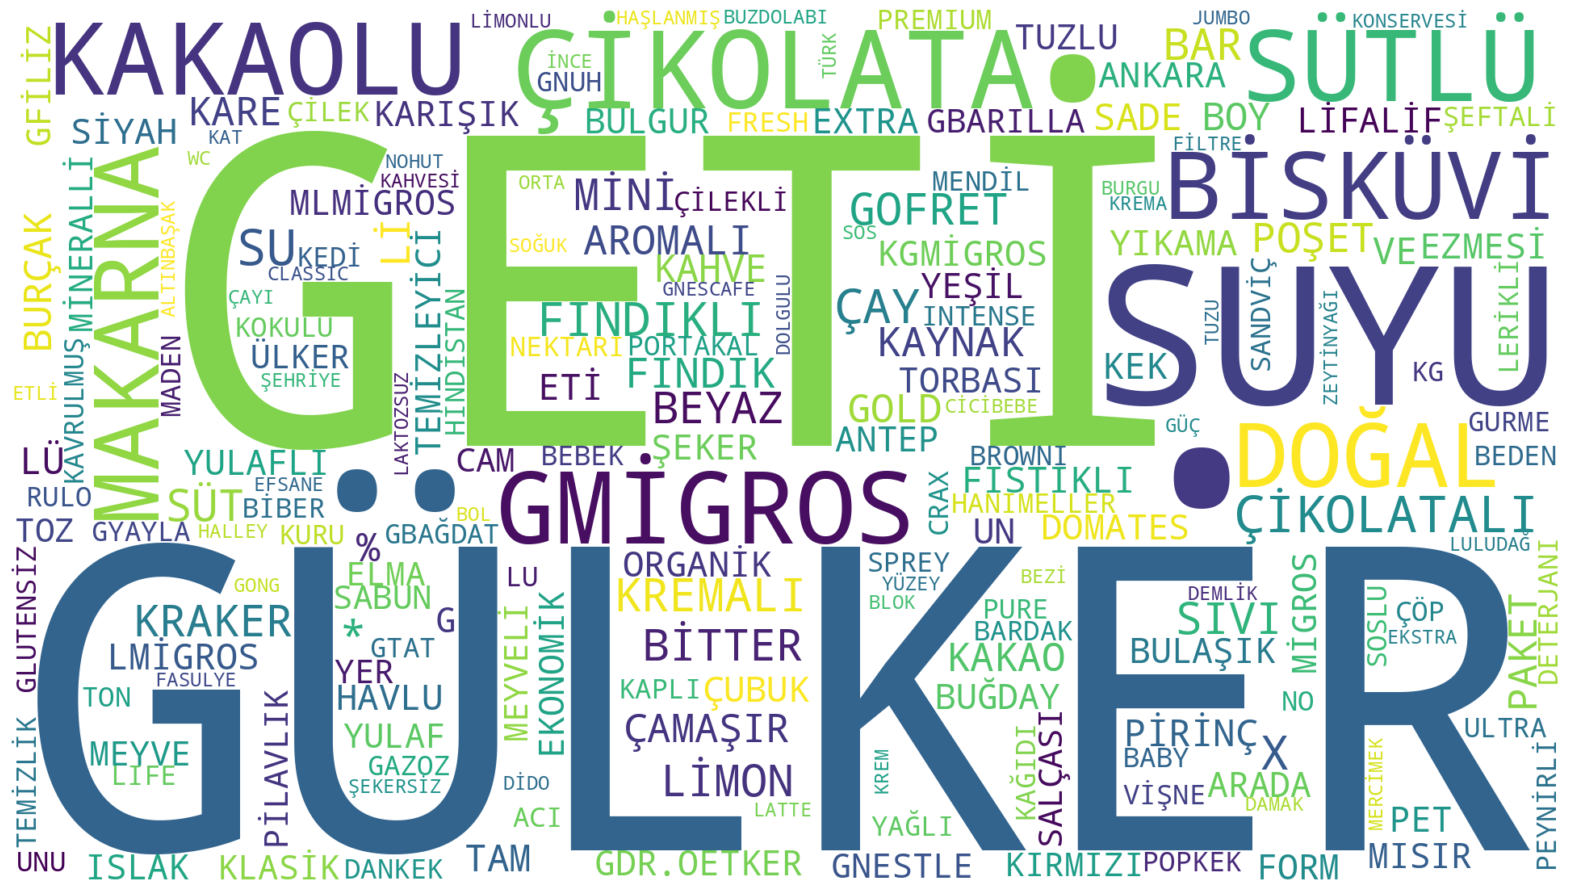

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

texts = ""
for index, row in all_magaza.iterrows():
    for text in row["Mal Adı"]:
        texts+="".join(text) 

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

texts=remove_numbers(texts)

word_freq = Counter(texts.split())


wordcloud = WordCloud(width=1920, height=1080,background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Bizim verideki siparişlere bakıldığında bu veride birliktelik analizi yapmak biraz mantıksız 
- veriler tarih ve kategorisine göre gruplandırılmış

onun yerine ilgili ürünlerin ilgili kategori içerisinde sipariş edilme sayısına bakabiliriz 

In [27]:
all_magaza["Kategori"].unique()

array(['B1', 'D1', 'D2', 'GD1', 'GD2', 'KOZ', 'NF1'], dtype=object)

In [28]:
len(all_magaza["Mal No"].max())

47

# Categories

## B1

In [29]:
all_magaza[(all_magaza["Kategori"]=="B1")]["Mal Adı"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [MİGROS BALDO PİRİNÇ 1KG, MİGROS DERMASON KURU FASULYE 1 KG, IRMAK KÜP ŞEKER 750 G, MİGROS AYÇİÇEK YAĞI 2L, SÖKE UN 1 KG., MUTLU İNCE UZUN MAKARNA 500 G, VERONELLİ ROMANO MAKARNA 160 G, FİLİZ SPAGETTI ÇUBUK MAKARNA 500 G, PASTAVİLLA MANTI 500G, GESAŞ TAHİN 350 G, MİGROS PUDRA ŞEKERİ 250G, TORKU FINDIK EZMESİ 370 G, JUSS SLIM %100 VİŞNE-ELMA MEYVE SUYU 200, PINAR SÜT 6*200 ML, MİGROS % 3 YAĞLI UHT İÇME SÜTÜ 200 ML, İÇİM RAHAT LAKTOZSUZ SÜT 500 ML, PINAR KİDO KAKAOLU SÜT 180 ML, DISNEY KAKAOLU SÜT 6X180 ML., PINAR LAKTOZSUZ PROTEİNLİ KA

In [30]:
b1_unique =[]
for mal_listesi in all_magaza[(all_magaza["Kategori"]=="B1")]["Mal Adı"]:
    for mal in mal_listesi:
        if mal not in b1_unique:
            b1_unique.append(mal)

In [31]:
len(b1_unique)

571

In [32]:
b1_orders = all_magaza[(all_magaza["Kategori"]=="B1")][["Sipariş Tarihi","Mal No"]].reset_index(drop=True)

In [33]:
b1_orders

,Sipariş Tarihi,Mal No
0,2024-03-02,"[1011179, 1020001, 3312872, 4110119, 5010401, 5030069, 5030250, 5030356, 5030701, 7080426, 7110327, 7155855, 8050319, 11010029, 11011522, 11013000, 11014072, 11014115, 11015050, 11019001, 1010179, 11019904, 1049977, 1050006, 1059960, 1089949, 4110118, 5030201, 5030346, 5030706, 5039551, 7155805, 8020030, 8038961, 11010066, 11010242, 11014119, 11014567, 11015051, 11019978, 16290753, 9025359, 9025360, 1010088, 5030168, 5030185, 5030209, 5030218, 5090032, 6021106, 7080020, 8035151, 8055261, 9020003, 11010060, 11011904, 11013029, 11014075, 11014322, 11015572, 9025357, 1011909, 1010145, 4130017, 5030167, 5030188, 5030208, 5030340, 5030341, 5030344, 5030352, 5030363, 5030364, 6035128, 7155883, 7155894, 8038959, 8038960, 8038963, 9024294, 9035762, 11010034, 11010408, 11013025]"
1,2024-03-03,"[8040595, 9024366, 9112162, 11010029, 11011522, 16290723, 1022301, 3312872, 3321714, 5010401, 5030210, 5030342, 5030349, 5030356, 7029700, 7085750, 7155709, 1011610, 1021990, 1049977, 1069986, 1089949, 3310008, 4111097, 5016869, 5030201, 5030205, 5030325, 5030346, 5030347, 5030355, 5030357, 5030367, 5030711, 5030726, 5039320, 5039483, 8022560, 9112124, 9112163, 9112186, 11015051, 16200808, 1010086, 1011183, 1089951, 3311033, 4131086, 5010405, 5016854, 5016870, 5030185, 5030206, 5030209, 5030212, 5030213, 5030336, 5030354, 5030359, 5039323, 5039484, 6021102, 7155883, 8054806, 8059114, 8059622, 9024201, 9062203, 1010087, 1010212, 1011182, 1089922, 1200013, 3310009, 5010019, 5016892, 5016913, 5030140, 5030184, 5030186, 5030188, 5030208, 5030211, 5030217, 5030327, 5030340, 5030341, 5030344, 5030351, 5030352, 5030360, 5030364, 5030710, 5039481, 5039624, 5041265, 5099211, 6016293, 6021253, 6035142, ...]"
2,2024-03-05,"[11010240, 11552590, 5030708, 5087008, 1011179, 5030349, 7155855, 5030356, 8058909, 4110119, 8063103, 1020001, 7110327, 5016625, 5030250, 5010402, 5030250, 8079641, 5030722, 8050299, 8010001, 1020015, 5030329, 5030346, 5039551, 6023558, 7155805, 7155873, 3312981, 5030205, 5039404, 5030347, 1075063, 8038961, 11010066, 11014568, 16290753, 5030216, 6021104, 1011611, 1061910, 1075063, 5030329, 8038961, 8050299, 6023212, 8035151, 9020003, 9035838, 1013526, 9024369, 7080020, 16290757, 1010088, 1075093, 5030168, 6021106, 8078908, 5099209, 5030218, 5090032, 1089940, 5030209, 5030354, 6021113, 6023212, 9035762, 11011524, 1012030, 8059119, 1010145, 5030352, 16290763, 16300551, 1069978, 5030340, 5030344, 7155883, 7155894, 6035142, 8038960, 9024364, 5039324, 1075029, 9024294, 5030184, 5030363, 1021028, 1070029, 5030341, 5030707, 8038960]"
3,2024-03-07,"[11552590, 1071014, 3321714, 4110119, 4111098, 4131096, 4133420, 5010401, 5010501, 5016625, 5016905, 5016912, 5030183, 5030210, 5030349, 5030356, 5030708, 5030742, 5039322, 5040604, 7029700, 7155709, 7155780, 7155793, 7155855, 8040595, 8050284, 8054807, 8054820, 8054821, 8054828, 8054962, 8063103, 9024365, 9024366, 9112162, 11011522, 11015050, 16290723, 3310008, 3312837, 4110118, 4131912, 5010025, 5010422, 5016797, 5016816, 5016869, 5030078, 5030085, 5030187, 5030201, 5030205, 5030207, 5030214, 5030216, 5030346, 5030347, 5030355, 5030357, 5030706, 5030722, 5030726, 5039320, 5039325, 5039482, 5039483, 5039486, 5099210, 7155805, 8010001, 8022555, 8022560, 8038961, 8054914, 9112124, 9112163, 11014073, 16290753, 46024362, 1011610, 1011611, 1013252, 1059960, 1069986, 1075063, 1080006, 1089975, 1010086, 1011183, 1012030, 1075098, 1075162, 3311033, 5010405, 5011205, 5011207, 5016854, 5016870, 5030055, ...]"
4,2024-03-09,"[1011179, 1011999, 1013510, 4111098, 5030250, 5030356, 7085750, 8050319, 8063103, 9024361, 11010029, 11011522, 11012000, 11013000, 11014072, 11014115, 11015050, 11015055, 11015553, 11019001, 11019904, 11552590, 5010401, 1020015, 1021990, 1049977, 1061991, 3310008, 3312981, 5030329, 5030346, 5030347, 5039551, 8050299, 8079641, 9112186, 11010010, 11010066, 11012783, 11014073, 11014119, 11014567, 11014568, 11015051, 11019204, 1010088, 1089940, 1089951, 503016

In [34]:
mal_numaralari = [mal for order in b1_orders['Mal No'] for mal in order]
siparis_sayilari = {mal: mal_numaralari.count(mal) for mal in set(mal_numaralari)}

In [35]:
b1_siparis_sayilari_df = pd.DataFrame({"Mal No":siparis_sayilari.keys(),
                                    "Sipariş Miktarı": siparis_sayilari.values()})

In [36]:
b1_siparis_sayilari_df["Mal Adı"] =b1_siparis_sayilari_df["Mal No"].map({v:k for k,v in mal_ad_no_dict.items()})

In [37]:
b1_siparis_sayilari_df

,Mal No,Sipariş Miktarı,Mal Adı
0,11010060,25,PINAR LAKTOZSUZ SÜT 500 ML
1,11010066,25,İÇİM RAHAT LAKTOZSUZ SÜT 1 L
2,8054802,13,DİMES %100 PORTAKAL 1 L
3,8054806,11,DİMES VİŞNE NEKTARI 1L
4,8054807,10,DİMES ŞEFTALİ NEKTARI 1 L
...,...,...,...
566,6021114,5,BİLLUR TUZ İYOTLU 3 KG.
567,6021115,9,PURELİFE HİMALAYA TUZU BEYAZ İYOTLU İNCE
568,11014140,12,DANONE DOĞAL SÜT 6*180ML
569,7155709,15,NUTELLA 750 G


##### bu ürünler B1 kategorisinde 1 aylık bbir zaman diliminde sipariş edilen ürünlerin ağırlğı(yani sipariş edilme sayısı) bulunmaktadır bunlar arasından enfazla sipariş edilenleri seçip birbirleri ile yakın bölgelere koyabiliriz veya sipariş miktarı eşit olanları seçip yakın yerlere koyabiliriz ?


In [38]:
# ortalama olarak her ürün 11 kez sipariş edilmiş
b1_siparis_sayilari_df["Sipariş Miktarı"].mean()

11.250437828371279

In [39]:
b1_siparis_sayilari_df["Sipariş Miktarı"].max(), b1_siparis_sayilari_df["Sipariş Miktarı"].min()

(42, 1)

In [40]:
b1_siparis_sayilari_df["Sipariş Miktarı"].describe().T

count    571.000000
mean      11.250438
std        8.118334
min        1.000000
25%        4.000000
50%       10.000000
75%       16.000000
max       42.000000
Name: Sipariş Miktarı, dtype: float64

In [41]:
b1_siparis_sayilari_df.sort_values(by="Sipariş Miktarı",ascending=False)

,Mal No,Sipariş Miktarı,Mal Adı
61,7155894,42,MİGROS YERFISTIĞI EZMESİ 350 G
256,5090032,39,MLIFE BIO ORGANİK YULAF EZMESİ 500 G
123,5030209,37,NUH ANKARA MİNİ PENNE MAKARNA 500 G
23,9035838,34,MLIFE BIO ORGANİK PİLAVLIK BULGUR 1 KG
222,9112124,33,YAYLA YEMEK HAZIR BARBUNYA PİLAKİ 400 G
...,...,...,...
427,1050007,1,DOYUM ORGANİK SARI MERCİMEK 1KG
317,1070026,1,TAT MİDYAT BULGUR 1 KG
529,46024605,1,REİS İÇ BAKLA (EGE) 750 G
75,5030086,1,PASTAVILLA TAM BUĞDAY SPAGETTİ 350 G


## D1


In [42]:
all_magaza[(all_magaza["Kategori"]=="D1")]["Mal Adı"]

16                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                [PEDIGREE BISCROCK ÖDÜL BİSKÜVİSİ 200 G, NAZAR SIVI ARAP SABUNU PORTAKAL ÇİÇEĞİ 1, MİGROS ULTRA BULAŞIK MAKİNASI TABLETİ 33, BİNGOMATİK SIVI BAKIM RENKLİ 4 L, OMO SIVI SIK YIKANANLAR 38 YIKAMA 2.470, DOMESTOS YÜZEY TEMİZLEYİCİ BAHAR ÇİÇEKLE, MR.MUSCLE ADVANCED POWER BANYO 750 ML, UNİ BABY AKTİF ISLAK MENDİL 72 Lİ, MR.MUSCLE 

In [43]:
d1_unique =[]
for mal_listesi in all_magaza[(all_magaza["Kategori"]=="D1")]["Mal Adı"]:
    for mal in mal_listesi:
        if mal not in d1_unique:
            d1_unique.append(mal)

In [44]:
len(d1_unique)

508

In [45]:
d1_orders = all_magaza[(all_magaza["Kategori"]=="D1")][["Sipariş Tarihi","Mal No"]].reset_index(drop=True)

In [46]:
d1_orders.head()

,Sipariş Tarihi,Mal No
0,2024-03-02,"[9076045, 29738307, 30403302, 30539574, 30539736, 30719715, 30733242, 31030205, 31315524, 31315656, 34326025, 30720565, 31310256, 30539741, 30560510, 30560517, 30560524, 30569697, 30581461, 30719557, 31200269, 9084025, 30530012, 30539573, 30539778, 30583301, 30589950, 30628716, 30719686, 30980457, 31030019, 31030078, 31605130, 41025381, 30720564, 30131988, 30530006, 30539575, 30539757, 30539795, 30583303, 30589997, 30719635, 31500096, 30539645]"
1,2024-03-03,"[29738301, 30125896, 30129440, 30403302, 30403303, 30530016, 30569609, 30569610, 30569680, 30619668, 30619670, 30619780, 31310256, 41025276, 9070030, 9080032, 29781575, 30569696, 30569723, 30580456, 30619696, 30630002, 31310096, 30130005, 30530012, 30539746, 30539756, 30539778, 30560515, 30569721, 30581900, 30719500, 30719630, 31030019, 31605180, 9078122, 30441895, 30569626, 30569627, 30719685, 30733252, 31315417, 31600040]"
2,2024-03-05,"[31183369, 9076045, 30569611, 30611212, 30569607, 30619752, 9084373, 31310211, 30619668, 31315656, 31600174, 32090018, 31100690, 30539647, 30619780, 30619702, 30303254, 30130484, 41025397, 41025222, 30131969, 30733268, 31200269, 9070030, 30619697, 29039926, 30569612, 9080032, 9080031, 30303254, 30619769, 30970009, 31600281, 41025165, 30719582, 30619765, 30980457, 30628716, 30570041, 41025042, 30539756, 30560515, 30560521, 30591228, 30611201, 9084025, 30970009, 30980457, 31600281, 30575005, 31310171, 30619695, 9084026, 30628735, 31315179, 41025166, 9070032, 9078122, 30539779, 41025365, 30130002, 41025159, 41997908]"
3,2024-03-07,"[30980596, 31600174, 29738301, 29789922, 30125896, 30530016, 30560928, 30619791, 30980477, 30980517, 31200119, 31315656, 32096593, 32096594, 9080032, 29567720, 29781575, 30129445, 30130484, 30560920, 30569696, 30580456, 30630002, 30733270, 30733271, 30980587, 31205412, 31310189, 31600087, 31600164, 9084025, 30131982, 30131994, 30411890, 30539624, 30539756, 30539778, 30560511, 30560515, 30569718, 30569721, 30581198, 30591228, 30619786, 30619814, 30723252, 30970009, 30980407, 30980566, 31030019, 31315643, 31600090, 32095053, 41025381, 30131993, 30569626, 30619804, 30733252, 30980330, 30980585, 31030754, 31200011, 31200204, 31315417]"
4,2024-03-09,"[9076045, 30619752, 31310256, 31600174, 30539736, 9070030, 9080031, 30131969, 30560517, 30560538, 30560927, 30581053, 30920523, 31200075, 31200176, 31200269, 31315185, 41025220, 41025222, 41025234, 41025397, 30730006, 29621513, 30131982, 30539756, 30569755, 30570041, 30611201, 30628716, 30731807, 30980566, 31030019, 31030078, 31200073, 41025042, 41025165, 31605180, 9078122, 29799590, 30530014, 30569720, 30581287, 30582445, 30733217, 31310171, 31315179, 41025166, 30539717]"


In [47]:
mal_numaralari = [mal for order in d1_orders['Mal No'] for mal in order]
d1_siparis_sayilari = {mal: mal_numaralari.count(mal) for mal in set(mal_numaralari)}

In [48]:
d1_siparis_sayilari_df = pd.DataFrame({"Mal No":d1_siparis_sayilari.keys(),
                                    "Sipariş Miktarı": d1_siparis_sayilari.values()})

In [49]:
d1_siparis_sayilari_df["Mal Adı"] =d1_siparis_sayilari_df["Mal No"].map({v:k for k,v in mal_ad_no_dict.items()})

In [50]:
d1_siparis_sayilari_df

,Mal No,Sipariş Miktarı,Mal Adı
0,30539777,21,OMO SIVI ACTIVE BEYAZ VE RENKLİ 26 YIKA
1,30539778,25,OMO SIVI ACTIVE FRESH BEYAZ 26 YIKAMA 16
2,30539779,17,OMO SIVI COLOR 26 YIKAMA 1690ML
3,30539780,6,OMO SIVI SİYAH 26 YIKAMA 1690ML
4,30539790,2,PERSİL YÜKSEK PERFORMANS UNIVERSAL 24 YI
...,...,...,...
503,30539756,19,TURSİL LEYLAK BAHÇESİ 2.145 ML 33 YIKAMA
504,30539757,6,OMO SIVI BIO SENSITIVE 1500 ML
505,30121967,6,PEROS MATİK GÖZ ALICI BEYAZLAR 7 KG
506,30539761,3,PERSİL YÜKSEK PERFORMANS UNIVERSAL 16 YI


##### bu ürünler D1 kategorisinde 1 aylık bbir zaman diliminde sipariş edilen ürünlerin ağırlğı(yani sipariş edilme sayısı) bulunmaktadır bunlar arasından enfazla sipariş edilenleri seçip birbirleri ile yakın bölgelere koyabiliriz veya sipariş miktarı eşit olanları seçip yakın yerlere koyabiliriz ?


In [51]:
# ortalama olarak her ürün 11 kez sipariş edilmiş
d1_siparis_sayilari_df["Sipariş Miktarı"].mean()

8.259842519685039

In [52]:
d1_siparis_sayilari_df["Sipariş Miktarı"].max(), d1_siparis_sayilari_df["Sipariş Miktarı"].min()

(40, 1)

In [53]:
d1_siparis_sayilari_df["Sipariş Miktarı"].describe().T

count    508.000000
mean       8.259843
std        6.614744
min        1.000000
25%        3.000000
50%        6.000000
75%       11.000000
max       40.000000
Name: Sipariş Miktarı, dtype: float64

In [54]:
d1_siparis_sayilari_df.sort_values(by="Sipariş Miktarı",ascending=False)

,Mal No,Sipariş Miktarı,Mal Adı
405,31315656,40,DOMESTOS WC BLOK 5Lİ GÜÇ OKYANUS FERAHLI
441,30131982,31,ARIEL OXI EKSTRA HİJYEN 5.5KG 36 YIKAMA
22,30619765,31,MİGROS SIVI BULAŞIK DETERJANI LİMON KOKU
406,31315655,30,DOMESTOS WC BLOK 5Lİ GÜÇ ÇAM FERAHLIĞI 2
363,30570088,29,MİGROS YUMUŞATICI LAVANTA 3 L
...,...,...,...
466,31500093,1,PEREJA SPREY ODA KOKUSU PUDRA 500 ML
467,31500094,1,PEREJA ÇUBUKLU ODA KOKUSU PUDRA 100 ML
468,31500096,1,PEREJA ÇUBUKLU ODA KOKUSU YASEMİN 100 ML
206,31200130,1,COOK JUMBO BOY ÇÖP TORBASI 7 ADET


## D2

In [55]:
all_magaza[(all_magaza["Kategori"]=="D2")]["Mal Adı"]

32                                                                                                                                                                                                                                                                                                                                                    [ECCO YEŞİL DÜNYA TUVALET KAĞIDI 12Lİ, PRIMA PAMPERS FRESH ISLAK HAVLU 9X52Lİ, MOLFIX AVANTAJLI PKT 3 BEDEN MIDI 4-9 KG, PRIMA PRM.CARE AYLIK FIRSAT 6NO 13+KG 93, İDEAL PORTAKAL KOKULU BÜZG.ÇÖP TORBASI O, SOFIA EL&YÜZ HAVLUSU 100'LÜ, MİNİES ISLAK TUVALET KAĞIDI 60LI, UNI BABY AKTİF SENSITIVE ISLAK MENDİL 3X, SOLO PEÇETE 200'LÜ, MOLFIX AVANTAJLI PKT 4 BEDEN MAXI 7-14 K, SLEEPY NATURAL JUMBO PAKET 5NO JUNIOR 11, PRIMA AB EKONOMİK PAKET 5 BEDEN 11-18 KG, SLEEPY DOĞAL ORGANİK PMK.ISLAK CEP MENDİ, BREF PRONATURE GREYFURT 2Lİ, PRIMA AB EKONOMİK PAKET BEDEN 15+ KG 34, VİVA SELECTION 3 KATLI TUVALET KAĞIDI 12, PAPİA HAVLU 12LI, MİGROS İÇTEN ÇEKMELİ JUMBO HAV

In [56]:
d2_unique =[]
for mal_listesi in all_magaza[(all_magaza["Kategori"]=="D2")]["Mal Adı"]:
    for mal in mal_listesi:
        if mal not in d2_unique:
            d2_unique.append(mal)

In [57]:
len(d2_unique)

205

In [58]:
d2_orders = all_magaza[(all_magaza["Kategori"]=="D2")][["Sipariş Tarihi","Mal No"]].reset_index(drop=True)

In [59]:
d2_orders.head()

,Sipariş Tarihi,Mal No
0,2024-03-02,"[31011983, 31030039, 31101113, 31109127, 31200196, 31040022, 31015002, 31030086, 31040208, 31101114, 31109889, 31109105, 31030080, 31310095, 31109107, 31010027, 31019956, 31020019, 31101116, 31109108, 31109892, 32090023, 31109106]"
1,2024-03-03,"[9078091, 31011983, 31021069, 31030081, 31032138, 31200172, 31200220, 31010013, 31015002, 31030300, 31040208, 31100686, 31109890, 31200222, 31200224, 32090017, 41025221, 41031080, 31100204, 32096632, 41025373, 31012008, 31102200, 41025398, 41252118, 41998796]"
2,2024-03-05,"[31180007, 31200196, 41025299, 31173463, 41031080, 31015002, 31010013, 41025375, 31170107, 41025221, 31200177, 31163618, 41025373, 31030310, 32090023, 41252118, 41025374, 32090015, 31020028, 31020019, 31032244, 31049162, 31170106, 41998796]"
3,2024-03-07,"[31011983, 31020231, 31021031, 31030039, 31030072, 31200172, 31315461, 31015002, 41031080, 31010013, 31030045, 31040208, 31100398, 31109004, 31109890, 31200222, 31200224, 31205348, 31020043, 31200070, 32096632, 46022443, 31030310, 31032244, 31020037, 31020038, 31040023, 31040202, 31100295, 31102200, 31205322, 31315463, 41025398]"
4,2024-03-09,"[9078091, 31021069, 31032138, 31100290, 31100292, 31200196, 31200220, 41025299, 31010013, 31040208, 31100282, 31100771, 32090017, 41025221, 41031080, 31030310, 31100204, 41025373, 41991910, 31020019, 31030204, 31040205, 32090016, 32090023, 41025374, 41025398, 41252118, 41998796, 31020038]"


In [60]:
mal_numaralari = [mal for order in d2_orders['Mal No'] for mal in order]
d2_siparis_sayilari = {mal: mal_numaralari.count(mal) for mal in set(mal_numaralari)}

In [61]:
d2_siparis_sayilari_df = pd.DataFrame({"Mal No":d2_siparis_sayilari.keys(),
                                    "Sipariş Miktarı": d2_siparis_sayilari.values()})

In [62]:
d2_siparis_sayilari_df["Mal Adı"] =d2_siparis_sayilari_df["Mal No"].map({v:k for k,v in mal_ad_no_dict.items()})

In [63]:
d2_siparis_sayilari_df

,Mal No,Sipariş Miktarı,Mal Adı
0,31109121,3,PRIMA AB MEGA FIRSAT PKT 6 BEDEN 13-18 K
1,31109124,3,PRIMA AB MEGA FIRSAT PKT 5 BEDEN 11-16 K
2,31315461,14,BREF POWER AKTİV ÇAM 2Lİ PAKET
3,31020037,7,SÜPER MAYLO BAMBU HAVLU 6'LI
4,31109127,12,PRIMA PRM.CARE AYLIK FIRSAT 6NO 13+KG 93
...,...,...,...
200,31020017,13,SELPAK DELUXE BAMBU KATKILI HAVLU 8Lİ
201,31020020,6,FAMILIA PLUS BAMBU HAVLU 12Lİ
202,31020027,21,SELPAK DELUXE BAMBU KATKILI HAVLU 12Lİ
203,31020028,29,MARE EKSTRA HAVLU 6'LI


##### bu ürünler D2 kategorisinde 1 aylık bbir zaman diliminde sipariş edilen ürünlerin ağırlğı(yani sipariş edilme sayısı) bulunmaktadır bunlar arasından enfazla sipariş edilenleri seçip birbirleri ile yakın bölgelere koyabiliriz veya sipariş miktarı eşit olanları seçip yakın yerlere koyabiliriz ?


In [64]:
# ortalama olarak her ürün 11 kez sipariş edilmiş
d2_siparis_sayilari_df["Sipariş Miktarı"].mean()

8.878048780487806

In [65]:
d2_siparis_sayilari_df["Sipariş Miktarı"].max(), d2_siparis_sayilari_df["Sipariş Miktarı"].min()

(37, 1)

In [66]:
d2_siparis_sayilari_df["Sipariş Miktarı"].describe().T

count    205.000000
mean       8.878049
std        6.993678
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       37.000000
Name: Sipariş Miktarı, dtype: float64

In [67]:
d2_siparis_sayilari_df.sort_values(by="Sipariş Miktarı",ascending=False)

,Mal No,Sipariş Miktarı,Mal Adı
25,31011983,37,ECCO YEŞİL DÜNYA TUVALET KAĞIDI 12Lİ
135,32096632,33,M BUZDOLABI POSETI 100LÜ 24*38 CM
54,31010013,32,SELPAK DELUXE TUVALET KAĞIDI 24LÜ
8,31021069,30,ECCO YEŞİL DÜNYA HAVLU 6LI
162,32090023,29,KOROPLAST BUZ TORBASI 7'Lİ 196 KÜP
...,...,...,...
35,9087145,1,BONNIE KEDİ KURU MAMA TAVUKLU 500 G
92,31030040,1,PRIMA PAMPERS TEKLİ AQUA PURE ISLAK HAVL
52,31160019,1,MİGROS YER BEZİ 50*60 CM.
130,31100773,1,PRIMA PRM.CARE FIRSAT PAKETİ 4 BEDEN 9-1


## GD1

In [68]:
all_magaza[(all_magaza["Kategori"]=="GD1")]["Mal Adı"]

48                                                                                                                                                                                                                                                                                                                      [ULUDAĞ EFSANE PORTAKAL 6*250 ML CAM, KIZILAY PLUS YEŞİLÇAYLI GİNSENGLİ LİMON, MİGROS LİMON DOĞAL ZENGİN MİNERALLİ İÇEC, ULUDAĞ DOĞAL MADEN SUYU 6*200 ML, FRUTTI EXTRA KAVUN 250 ML, FRUTTI EXTRA MANDALİNA 250 ML, SIRMA MADEN SUYU 6X200 ML, DİDİ ŞEFTALİ 250 ML, DİDİ ŞEFTALİ 1.5 L, SARIKIZ PET SU 5 L, ABANT DOĞAL KAYNAK SUYU 1.5 L, HAYAT SU BEBEK 6*330 ML, NESTLE PURE LIFE SU 10 L, DOĞANAY ŞALGAM SUYU SADE 1000 ML, TAT DOMATES SALÇASI CAM 710 G, İPEK TATLI BİBER SALÇASI 650 G CAM, BURCU ENGİNAR KONSERVESİ CAM 540 G, PENGUEN BEZELYE KONSERVESI 680 G CAM, TAT DOMATES SALÇASI 1500G, MİGROS KARIŞIK TURŞU 680 G, PIN COOL LİME SOĞUK ÇAY NANE&LİMON&MİSKE, BEYOĞLU REYHAN VE GÜL AROMALI GAZ

In [69]:
gd1_unique =[]
for mal_listesi in all_magaza[(all_magaza["Kategori"]=="GD1")]["Mal Adı"]:
    for mal in mal_listesi:
        if mal not in gd1_unique:
            gd1_unique.append(mal)

In [70]:
gd1_unique[:5]

['ULUDAĞ EFSANE PORTAKAL 6*250 ML CAM',
 'KIZILAY PLUS YEŞİLÇAYLI GİNSENGLİ LİMON',
 'MİGROS LİMON DOĞAL ZENGİN MİNERALLİ İÇEC',
 'ULUDAĞ DOĞAL MADEN SUYU 6*200 ML',
 'FRUTTI EXTRA KAVUN 250 ML']

In [71]:
len(gd1_unique)

433

In [72]:
gd1_orders = all_magaza[(all_magaza["Kategori"]=="GD1")][["Sipariş Tarihi","Mal No"]].reset_index(drop=True)

In [73]:
gd1_orders.head()

,Sipariş Tarihi,Mal No
0,2024-03-02,"[8022857, 8040203, 8040593, 8040650, 8040684, 8040687, 8040900, 8050857, 8050860, 8060078, 8060191, 8060552, 8061661, 8078930, 9010020, 9012037, 9024267, 9035452, 9035880, 16200800, 8020018, 8028212, 8040143, 8040655, 8040944, 8040960, 8050853, 8050855, 8050864, 8060124, 8060129, 8062251, 8063005, 8113109, 9025365, 9032356, 9050034, 9102118, 16200209, 16200355, 46021477, 6031302, 6035126, 8020024, 8028280, 8040081, 8040085, 8040938, 8050858, 8052808, 8060126, 8060249, 8061656, 8063006, 8082268, 8110029, 8113160, 9010045, 9010077, 9010339, 9019898, 9024352, 9032535, 9050126, 9051117, 16200310, 16200642, 16200951, 9010085, 8038986, 8040685, 8040978, 8050865, 8054926, 8059526, 8060028, 8060176, 8060190, 8060259, 8060451, 8061605, 8061657, 8062202, 8062215, 8062266, 8062270, 8064354, 8110030, 8110034, 8900069, 9010017, 9011059, 9012019, 9025364]"
1,2024-03-03,"[8040087, 8040593, 8040684, 8040687, 8050854, 8060078, 8060127, 8060171, 8060172, 8060191, 8060192, 8060552, 8060570, 8078972, 9010276, 9025363, 9035749, 9051116, 16200802, 8010202, 8020000, 8028246, 8038901, 5030200, 6035028, 8020018, 8038949, 8038950, 8040143, 8040689, 8050170, 8060129, 8062201, 8062217, 8062251, 8063000, 9010009, 9011025, 9012035, 9012510, 9020016, 9035731, 9035761, 9035868, 9050034, 6035126, 8020012, 8020024, 8022862, 8035150, 8038954, 8040681, 8040688, 8060076, 8060084, 8060126, 8060704, 8061656, 8062205, 8063006, 9024352, 16420145, 46024863, 8040009, 8040057, 8040079, 8040680, 8040804, 8040978, 8050328, 8056220, 8060028, 8060190, 8061657, 8062200, 8062202, 8062215, 8062266, 8062270, 8078920, 8078973, 9012034, 9020015, 9035891, 9035900, 46025977]"
2,2024-03-05,"[8050860, 9010020, 8040650, 8059616, 9024267, 8035501, 8060192, 9030016, 9035525, 9060005, 6035023, 8035249, 8040202, 8050854, 9035750, 8060191, 8078930, 9010310, 16021334, 46024868, 8060078, 8060127, 8061661, 16200800, 8060189, 6031310, 8030060, 9035880, 8040202, 8038966, 8113109, 8028212, 8040960, 8054927, 8059624, 8060129, 6035158, 8050170, 8050861, 8035091, 8050864, 8055513, 8063005, 8035512, 16200210, 8038949, 8063000, 9032356, 8020018, 8050855, 8062217, 8062251, 46024867, 16400844, 7050163, 8020018, 8028212, 8035091, 8038949, 8050864, 9032356, 8038967, 16411033, 8082268, 8020024, 8040636, 8050858, 8061656, 9024356, 8038965, 8110029, 9010085, 9032535, 8063006, 9024352, 16420145, 8028280, 8040676, 9010045, 9010339, 6035126, 9024356, 9010279, 8040685, 8060259, 8060451, 8050863, 8060190, 8064354, 9035510, 6031311, 8060028, 9012019, 9033763, 9035891, 46025977, 8062202, 7050522, 7050426, 8040677, ...]"
3,2024-03-07,"[8059616, 9060005, 46024868, 5040244, 8010202, 8020000, 8020023, 8028227, 8028246, 8038901, 8040650, 8040684, 8040687, 8040900, 8050854, 8053257, 8054980, 8060127, 8060171, 8060172, 8060192, 8060570, 8061654, 8061661, 8062216, 8063100, 8078930, 8078972, 9010020, 9010276, 9010311, 9024267, 9025343, 9025366, 9035749, 9051116, 16200802, 16400750, 46024867, 8035512, 6031326, 6035013, 7050303, 8020018, 8028212, 8035091, 8038949, 8038950, 8040088, 8040143, 8040944, 8040960, 8050252, 8050853, 8054927, 8060009, 8060129, 8062201, 8062217, 8062251, 8063000, 8063005, 8063102, 8079826, 9010003, 9010009, 9010049, 9012035, 9012510, 9020016, 9030020, 9035731, 9035760, 9050034, 9102118, 16200351, 16400844, 8035091, 6035126, 7050425, 8020012, 8020024, 8028244, 8038954, 8038965, 8040938, 8053254, 8054924, 8060047, 8060084, 8060126, 8060249, 8060704, 8061655, 8061656, 8062205, 8063006, 9010045, 9024352, 9032535, ...]"
4,2024-03-09,"[8040202, 8040650, 8040666, 8050860, 8059616, 8060078, 8060171, 8060191, 8060192, 8061661, 8110049, 16200950, 16420135, 46024868, 6031317, 8020018, 8038949, 8040689, 8050170, 8050855, 8050864, 8060124, 8060129, 8060215, 8062217, 8062251, 8063005, 9012035, 9025365, 8040710, 6035126, 8020024, 8022862, 8028280, 8038967, 8040144, 8040676, 8050858, 8060047, 8060076, 8060126, 8061656, 8062205, 8063006, 8082268, 8110029, 8113117, 9010339, 9024352

In [74]:
mal_numaralari = [mal for order in gd1_orders['Mal No'] for mal in order]
gd1_siparis_sayilari = {mal: mal_numaralari.count(mal) for mal in set(mal_numaralari)}

In [75]:
gd1_siparis_sayilari_df = pd.DataFrame({"Mal No":gd1_siparis_sayilari.keys(),
                                    "Sipariş Miktarı": gd1_siparis_sayilari.values()})

In [76]:
gd1_siparis_sayilari_df["Mal Adı"] =gd1_siparis_sayilari_df["Mal No"].map({v:k for k,v in mal_ad_no_dict.items()})

In [77]:
gd1_siparis_sayilari_df

,Mal No,Sipariş Miktarı,Mal Adı
0,9050126,2,DARDANEL EKONOMİK TON 2X140 G
1,9050133,8,KALİTE TONLA AYÇİÇEK YAĞLI TON BALIĞI 2*
2,8063000,29,SAKA DOĞAL MİNERALLİ SU 0.5 L
3,8063001,22,SAKA DOĞAL MİNERALLİ SU 1.5 L
4,8028185,13,ÇAMLICA LİMON AROMALI GAZOZ 12X200 ML
...,...,...,...
428,9035760,18,MİGROS GARNİTÜR 560G
429,9035761,14,TUKAŞ KÖZLENMİŞ PATLICAN 650 G
430,16300021,9,PINAR MAYONEZ 350 G
431,8022010,8,ULUDAĞ EFSANE PORTAKAL PET 1 L


##### bu ürünler GD1 kategorisinde 1 aylık bbir zaman diliminde sipariş edilen ürünlerin ağırlğı(yani sipariş edilme sayısı) bulunmaktadır bunlar arasından enfazla sipariş edilenleri seçip birbirleri ile yakın bölgelere koyabiliriz veya sipariş miktarı eşit olanları seçip yakın yerlere koyabiliriz ?


In [78]:
# ortalama olarak her ürün 11 kez sipariş edilmiş
gd1_siparis_sayilari_df["Sipariş Miktarı"].mean()

11.699769053117782

In [79]:
gd1_siparis_sayilari_df["Sipariş Miktarı"].max(), gd1_siparis_sayilari_df["Sipariş Miktarı"].min()

(57, 1)

In [80]:
gd1_siparis_sayilari_df["Sipariş Miktarı"].describe().T

count    433.000000
mean      11.699769
std        9.975313
min        1.000000
25%        4.000000
50%        9.000000
75%       17.000000
max       57.000000
Name: Sipariş Miktarı, dtype: float64

In [81]:
gd1_siparis_sayilari_df.sort_values(by="Sipariş Miktarı",ascending=False)

,Mal No,Sipariş Miktarı,Mal Adı
297,8060190,57,ABANT DOĞAL KAYNAK SUYU 0.5 L
298,8060191,57,ABANT DOĞAL KAYNAK SUYU 1.5 L
299,8060192,54,ABANT DOĞAL KAYNAK SUYU 5 L
6,8063005,50,SAKA DOĞAL MİNERALLİ SU 5 L
273,8060129,43,GÜMÜŞ DOĞAL KAYNAK SUYU 5.25 L
...,...,...,...
363,9035476,1,TAMEK BEZELYE TNK 830 G.
366,9035495,1,TAMEK BEZELYE 670 G CAM
377,8030007,1,BEYOĞLU LİMON.NANELİ DOĞ.ZEN.MİNER.GAZ.İ
378,8030008,1,BEYOĞLU PORT.LİMON MEYV.DOĞAL ZENGİ.MİN.


## GD2

In [82]:
all_magaza[(all_magaza["Kategori"]=="GD2")]["Mal Adı"]

64                                                                           [KOCATEPE 1949 TÜRK KAHVESİ 100 G, MİGROS GOLD KAHVE EKONOMİK PAKET 100 G, LOR ESPRESSO 07 SPLENDENTE 10LU KAPSÜL K, INDOMIE TAVUK ÇEŞNİLİ NOODLE 70 G*5Lİ PA, MİGROS ZEYTİNYAĞLI KEPEKLİ GRİSSİNİ  125, PEYMAN NUTZZ POPCORN KARAMELLİ 90 G, CİPSO MAX ORIGINAL PARTİ BOY PATATES CİP, ETİ GONG BALLI HARDALLI 68 G, BAHARAT DÜNYASI KEKİK 20 G, ETİ  CRAX PEYNİRLİ ÇUBUK KRAKER 80 G, ETİ TUTKU KAKAO KREMALI 100 G, ETİ PUF KAKAOLU 18 G, RICE UP SUNFLOWERS SEEDS PİRİNÇ PATLAĞI, ÜLKER ALTINBAŞAK GRİSSİNİ KEPEKLİ 125 G, MCVITIES KARAMELLİ BİSKÜVİ 120G, ÜLKER ÇOKOPRENS BİSKÜVİ MİDİ 160 G, ÜLKER MİNİ HALLEY 66 G, BİSKREM KAKAOLU 200 G, TWIX EXTRA 75 G, ETİ İÇİBOL FINDIKLI SÜTLÜ ÇİKOLATA 30 G, BOUNTY 57 G, RAFAELLO T15 ÇİKOLATA 150 G, ÜLKER FINDIKLI SÜTLÜ BATON ÇİKOLATA 30 G, ETİ AHENK GURME ÇİK.KAPLI FINDIK KREMA.G, ÜLKER BİTTER KARE ÇİKOLATA %60 KAKAOLU 6, ÇAYKUR RİZE TURİST ÇAY 1000 G, LİPTON EARL GREY ÇAY 500 G, DOĞUŞ GURME

In [83]:
gd2_unique =[]
for mal_listesi in all_magaza[(all_magaza["Kategori"]=="GD2")]["Mal Adı"]:
    for mal in mal_listesi:
        if mal not in gd2_unique:
            gd2_unique.append(mal)

In [84]:
gd2_unique[:5]

['KOCATEPE 1949 TÜRK KAHVESİ 100 G',
 'MİGROS GOLD KAHVE EKONOMİK PAKET 100 G',
 'LOR ESPRESSO 07 SPLENDENTE 10LU KAPSÜL K',
 'INDOMIE TAVUK ÇEŞNİLİ NOODLE 70 G*5Lİ PA',
 'MİGROS ZEYTİNYAĞLI KEPEKLİ GRİSSİNİ  125']

In [85]:
len(gd2_unique)

1081

In [86]:
gd2_orders = all_magaza[(all_magaza["Kategori"]=="GD2")][["Sipariş Tarihi","Mal No"]].reset_index(drop=True)

In [87]:
gd2_orders.head()

,Sipariş Tarihi,Mal No
0,2024-03-02,"[3212017, 3231537, 3242976, 5030460, 5052902, 5089576, 5089583, 5099134, 6016237, 7010765, 7010979, 7010983, 7010987, 7017061, 7017878, 7018216, 7019662, 7019726, 7030506, 7038585, 7040001, 7040240, 7046981, 7167677, 7038032, 3111303, 3118287, 3118397, 3118461, 3133000, 3231564, 3242969, 5030461, 5046462, 5089510, 5092241, 5096312, 6012974, 6023560, 7010022, 7010708, 7012053, 7012145, 7012346, 7013841, 7017995, 7019619, 7019795, 7020070, 7029468, 7033764, 7034336, 7034568, 7034589, 7037272, 7040020, 7116790, 7124247, 7150034, 7163345, 7168282, 7170916, 9112209, 3111305, 3231310, 3118449, 3134192, 3271979, 5040404, 5089580, 5099121, 5104002, 5106699, 7010204, 7010216, 7010951, 7011172, 7012515, 7013099, 7015173, 7030505, 7034274, 7036296, 7036671, 7036806, 7037054, 7037273, 7039576, 7040654, 7040655, 7043435, 7163020, 7164309, 8079716, 8079757, 8089677, 9112123, 7038030, 7034272, 3118635, ...]"
1,2024-03-03,"[3118364, 3134315, 3210003, 3212075, 3222633, 3222641, 3222796, 3231537, 3240006, 3281014, 3321776, 5039579, 5089440, 5098246, 5099134, 6011270, 6012962, 6012972, 7010049, 7010426, 7017082, 7017878, 7019662, 7019715, 7029467, 7046981, 7160352, 7160817, 7163522, 7167716, 7169503, 3111303, 3112407, 3113406, 3118272, 3118643, 3212004, 3222634, 3231533, 5030461, 5046462, 5083605, 5096401, 6011218, 6012973, 6016239, 6070029, 7010022, 7010634, 7010708, 7010956, 7012053, 7012145, 7013841, 7017074, 7019125, 7019626, 7033245, 7033764, 7037274, 7040124, 7040585, 7044480, 7120174, 7120299, 7120374, 7136467, 7160381, 8079622, 8079843, 8084038, 8089218, 8097404, 9035899, 3112524, 3118318, 3118449, 3134305, 3242951, 3271980, 3272054, 5015011, 5025121, 5046460, 5046461, 5089532, 5089580, 5090031, 5099133, 6012969, 6016314, 6061419, 7010051, 7010196, 7010204, 7010216, 7010237, 7012515, 7030041, 7030387, ...]"
2,2024-03-05,"[3133002, 7010209, 7040001, 8079831, 5089576, 7010295, 3142920, 5099242, 6012975, 7161716, 7163522, 7017152, 8089678, 7038585, 7117117, 3118119, 7010020, 7010804, 7017159, 3111650, 5030460, 7042345, 7011473, 7042345, 8079831, 7037272, 7164146, 3242969, 7116790, 8079756, 3111307, 3117303, 3118397, 5096312, 5092241, 7012145, 7033245, 3252563, 7010980, 7034336, 3222688, 6021100, 7030395, 7160002, 7163049, 7040121, 7163345, 3118287, 5040512, 5106704, 46022170, 3133000, 5106710, 9024296, 3134394, 6012974, 7013414, 7018452, 7030196, 7019125, 7037275, 3252563, 6061419, 7010051, 7010198, 7032985, 7037273, 7160003, 3118449, 5099203, 7010601, 8079849, 5104002, 7010982, 7017996, 7160641, 3111316, 7169802, 3111312, 5040404, 5096421, 7167717, 3134193, 3272003, 3281016, 7011050, 7013099, 7015173, 7036806, 8089677, 3118486, 3271979, 3271406, 5098220, 6010085, 7010112, 7030505, 7034274, 3222799, 6011275, ...]"
3,2024-03-07,"[7038585, 7040001, 7161716, 3133002, 3111315, 3118645, 3210003, 3222633, 3222641, 3222689, 3222697, 3222796, 3231606, 3321776, 3331015, 5038653, 5041923, 5060708, 5089440, 5089576, 5089583, 5098246, 5099134, 6011209, 6011270, 6012960, 6012962, 6012972, 6012975, 6016487, 6061411, 6071301, 7010049, 7010765, 7010919, 7010946, 7010979, 7017082, 7018022, 7019122, 7019616, 7019847, 7019848, 7033825, 7034533, 7036803, 7040240, 7100021, 7113498, 7120223, 7120375, 7120376, 7129971, 7160123, 7160186, 7160270, 7160352, 7160817, 7163522, 7167716, 7209945, 7209946, 8079677, 8079704, 8079834, 7034336, 7040121, 7160002, 3133000, 7030395, 3272060, 3291014, 5030461, 5046462, 5048587, 5060506, 5089434, 5089510, 5096401, 5099214, 5106704, 6010066, 6011208, 6011218, 6012973, 6012974, 6016239, 6061410, 6070029, 7010022, 7010222, 7010634, 7010635, 7011102, 7011122, 7012145, 7012523, 7017001, 7017083, 7029719, ...]"
4,2024-03-09,"[3118266, 3133002, 3142921, 3231537, 3240006, 5099134, 5099205, 7010020, 7010209, 7010950, 7011473, 7017082, 7017152, 7017159, 7018225, 7019122, 7019715, 7019726, 7028054, 7030434, 7030451, 7037024, 7037334, 7038585, 7040001, 7040080, 7040240, 7044482, 7110277, 7111206, 7160123

In [88]:
mal_numaralari = [mal for order in gd2_orders['Mal No'] for mal in order]
gd2_siparis_sayilari = {mal: mal_numaralari.count(mal) for mal in set(mal_numaralari)}

In [89]:
gd2_siparis_sayilari_df = pd.DataFrame({"Mal No":gd2_siparis_sayilari.keys(),
                                    "Sipariş Miktarı": gd2_siparis_sayilari.values()})

In [90]:
gd2_siparis_sayilari_df["Mal Adı"] =gd2_siparis_sayilari_df["Mal No"].map({v:k for k,v in mal_ad_no_dict.items()})

In [91]:
gd2_siparis_sayilari_df

,Mal No,Sipariş Miktarı,Mal Adı
0,3411972,17,MİGROS KAHVE BEYAZLATICI EKONOMİK PAKET
1,6041606,4,KNORR PEYNİRLİ MAKARNA SOSU 50 G
2,7030800,34,ÜLKER KUVERTÜR BİTTER ÇİKOLATA 200 G
3,7036372,24,ETİ KARAM %70 KAKAOLU BİTTER ÇİKOLATA 60
4,6012960,6,ARİFOĞLU ACI KIRMIZI ACI TOZ BİBER 60 G
...,...,...,...
1076,7116790,9,HARIBO MEGA PARTY KARIŞIK ŞEKERLEME 200
1077,7010295,4,MOMS GLUTENSİZ MÜSLİ 300 G
1078,7010297,4,MOMS GLUTENSİZ ELMALI TARÇINLI GRANOLA 3
1079,7012346,20,ETİ FORM TAM ÇAVDAR EKŞİ MAYALI BİSKÜVİ


##### bu ürünler GD1 kategorisinde 1 aylık bbir zaman diliminde sipariş edilen ürünlerin ağırlğı(yani sipariş edilme sayısı) bulunmaktadır bunlar arasından enfazla sipariş edilenleri seçip birbirleri ile yakın bölgelere koyabiliriz veya sipariş miktarı eşit olanları seçip yakın yerlere koyabiliriz ?


In [92]:
# ortalama olarak her ürün 13 kez sipariş edilmiş
gd2_siparis_sayilari_df["Sipariş Miktarı"].mean()

13.309898242368178

In [93]:
gd2_siparis_sayilari_df["Sipariş Miktarı"].max(), gd2_siparis_sayilari_df["Sipariş Miktarı"].min()

(49, 1)

In [94]:
gd2_siparis_sayilari_df["Sipariş Miktarı"].describe().T

count    1081.000000
mean       13.309898
std         9.765263
min         1.000000
25%         5.000000
50%        11.000000
75%        20.000000
max        49.000000
Name: Sipariş Miktarı, dtype: float64

In [95]:
gd2_siparis_sayilari_df.sort_values(by="Sipariş Miktarı",ascending=False)

,Mal No,Sipariş Miktarı,Mal Adı
948,7010022,49,ETİ CİCİBEBE BİSKÜVİ 1 KG.
972,7169801,45,ETİ LİFALİF BİTTER ÇİKOLATALI MÜSLİ BAR
107,7160035,45,ÜLKER ÇOKONAT 33 G
887,5099134,45,ETİ GONG BALLI HARDALLI 68 G
625,7163049,44,ÜLKER DİDO 35 G
...,...,...,...
517,7209924,1,DR. OETKER TRİLEÇE HİNDİSTAN CEVİZLİ 312
357,9112208,1,YAYLA SALATA HAZIR TATLI MİKS 120 G
513,7209925,1,PATISWISS ANTEP FISTIKLI HURMA BAR 45 G
851,7114309,1,KENT TOPİTOP MÜZİK LOLİPOP ŞEKERLEME POŞ


## KOZ

In [96]:
all_magaza[(all_magaza["Kategori"]=="KOZ")]["Mal Adı"]

80                                                         [PAREX HAVLU PASPAS, WHISKAS TON BALIKLI POŞET YAŞ MAMA 85 G, DREAMIES MEGA SOMONLU 180G KEDİ ÖDÜL MAM, PEDIGREE RODEO ÇİĞNEME ÇEREZİ 70 G, WHİSKAS TAVUKLU POŞET KEDİ YAŞ MAMA 85 G, WHISKAS SOMONLU POŞET YAŞ MAMA 85 G, PEDIGREE DENTASTIX MEDIUM ÖDÜL MAMASI 18, BANAT BULAŞIK  FIRÇASI, WHISKAS KÜMES HAYVANLI SEÇİM POŞET YAŞ M, WHISKAS BALIKLI SEÇİM POŞET YAŞ MAMA 4X8, WHISKAS TASTY MİX KUZULU&HAVUÇLU YAŞ MAM, PEDIGREE TASTY MINIS 140G KÖPEK ÖDÜL MAM]
81                                                                                                                    [SLEEPY EASY CLEAN YÜZEY TEMİZLİK HAVLUSU, ROLL-UP STANDART TEMİZLİK ELDİVENİ LARGE, PEDIGREE RODEO 7Lİ KÖPEK ÇİĞNEME ÇEREZİ, DEEPFRESH ALKOL BAZLI ANTİVİRAL ISLAK CE, PAREX KLASİK YEŞİL DÜZ SÜNGER 5'Lİ EKO P, ROLL-UP GIDA TEMASINA UYGUN PUDRASIZ ELD, GOURMET GOLD KIYILMIŞ TAVUKLU KEDİ MAMAS, DURU BEYAZ KLASİK 600 G, WHISKAS BALIKLI SEÇİM POŞET YAŞ MAMA 4X8, S.BRITE 5

In [97]:
koz_unique =[]
for mal_listesi in all_magaza[(all_magaza["Kategori"]=="KOZ")]["Mal Adı"]:
    for mal in mal_listesi:
        if mal not in koz_unique:
            koz_unique.append(mal)

In [98]:
koz_unique[:5]

['PAREX HAVLU PASPAS',
 'WHISKAS TON BALIKLI POŞET YAŞ MAMA 85 G',
 'DREAMIES MEGA SOMONLU 180G KEDİ ÖDÜL MAM',
 'PEDIGREE RODEO ÇİĞNEME ÇEREZİ 70 G',
 'WHİSKAS TAVUKLU POŞET KEDİ YAŞ MAMA 85 G']

In [99]:
len(koz_unique)

101

In [100]:
koz_orders = all_magaza[(all_magaza["Kategori"]=="KOZ")][["Sipariş Tarihi","Mal No"]].reset_index(drop=True)

In [101]:
koz_orders.head()

,Sipariş Tarihi,Mal No
0,2024-03-02,"[31205161, 41025386, 41031105, 9076040, 41025379, 41025380, 41031040, 31321000, 41025384, 41025387, 41025389, 41031106]"
1,2024-03-03,"[31163683, 31180039, 41031099, 31030073, 31173392, 31180228, 41025296, 29037000, 41025387, 41251510]"
2,2024-03-05,"[31163683, 41031099, 31180039, 41031099, 41031059, 9076040, 31180228, 41031106, 31170058]"
3,2024-03-07,"[29037700, 41025296, 29818740, 31200101, 41031106, 32095090, 41025247, 41025378]"
4,2024-03-09,"[31180039, 31205161, 41025295, 41031099, 9076040, 31173392, 31180228, 41025296, 41031059, 31205020, 31180021, 41025279, 41031106]"


In [102]:
mal_numaralari = [mal for order in koz_orders['Mal No'] for mal in order]
koz_siparis_sayilari = {mal: mal_numaralari.count(mal) for mal in set(mal_numaralari)}

In [103]:
koz_siparis_sayilari_df = pd.DataFrame({"Mal No":koz_siparis_sayilari.keys(),
                                    "Sipariş Miktarı": koz_siparis_sayilari.values()})

In [104]:
koz_siparis_sayilari_df["Mal Adı"] =koz_siparis_sayilari_df["Mal No"].map({v:k for k,v in mal_ad_no_dict.items()})

In [105]:
koz_siparis_sayilari_df

,Mal No,Sipariş Miktarı,Mal Adı
0,31170058,8,SCOTCH BRITE YEŞİL KLASİK SÜNGER 4'LÜ
1,36501016,2,WEE BABY ŞEFFAF DESENLİ DAMAKLI EMZİK 18
2,31551001,1,OFF AQUA PUMP LOSYON SPRAY 100 ML
3,29147700,11,DALAN ANTİK PİRİNA KOKULU SABUN 5*180 G
4,29031500,5,HACI ŞAKİR KALIP SABUN DOĞAL 4*150 G
...,...,...,...
96,31605189,3,UNI BABY BEBEKSİ DOKUNUŞ BEBEK KOLONYASI
97,29037000,6,DURU BEYAZ KLASİK 600 G
98,29037003,3,DURU BEYAZ LAVANTA 600 G
99,32095200,10,KOROPLAST FIRIN TORBASI 8'Lİ


##### bu ürünler KOZ kategorisinde 1 aylık bbir zaman diliminde sipariş edilen ürünlerin ağırlğı(yani sipariş edilme sayısı) bulunmaktadır bunlar arasından enfazla sipariş edilenleri seçip birbirleri ile yakın bölgelere koyabiliriz veya sipariş miktarı eşit olanları seçip yakın yerlere koyabiliriz ?


In [106]:
# ortalama olarak her ürün 6 kere sipariş edilmiş
koz_siparis_sayilari_df["Sipariş Miktarı"].mean()

6.643564356435643

In [107]:
koz_siparis_sayilari_df["Sipariş Miktarı"].max(), koz_siparis_sayilari_df["Sipariş Miktarı"].min()

(44, 1)

In [108]:
koz_siparis_sayilari_df["Sipariş Miktarı"].describe().T

count    101.000000
mean       6.643564
std        6.559854
min        1.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       44.000000
Name: Sipariş Miktarı, dtype: float64

In [109]:
koz_siparis_sayilari_df.sort_values(by="Sipariş Miktarı",ascending=False)

,Mal No,Sipariş Miktarı,Mal Adı
51,31163683,44,SLEEPY EASY CLEAN YÜZEY TEMİZLİK HAVLUSU
38,31180039,27,ROLL-UP STANDART TEMİZLİK ELDİVENİ LARGE
33,31180021,25,ROLL-UP STANDART TEMİZLİK ELDİVENİ MEDIU
95,31180228,25,ROLL-UP GIDA TEMASINA UYGUN PUDRASIZ ELD
52,31205161,20,PAREX HAVLU PASPAS
...,...,...,...
25,31160026,1,KOROPLAST ISLAK HAVLU ÇOK AMAÇLI FERAH K
39,31500044,1,GLADE AEROSOL SABAH TAZELIĞI 300 ML
36,29860100,1,KIRLANGIC SABUN ZEYTİNYAĞLI 125 G
53,31163690,1,SCOTCH BRITE ISLAK MUTFAK BEZİ 40 YAPRAK


## NF1

In [110]:
all_magaza[(all_magaza["Kategori"]=="NF1")]["Mal Adı"]

96                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [111]:
nf1_unique =[]
for mal_listesi in all_magaza[(all_magaza["Kategori"]=="NF1")]["Mal Adı"]:
    for mal in mal_listesi:
        if mal not in nf1_unique:
            nf1_unique.append(mal)

In [112]:
nf1_unique[:5]

['ETİ FORM TAHIL PATLAĞI 41 G',
 'ETİ CRAX PATLAYAN LEZZET PEYNR.SOĞANLI Ç',
 'HARIBO TROPİFRUTİ KİLİTLİ PAKET 200 G',
 'PAKMAYA BİTTER PUL ÇİKOLATA 100 G',
 'PEYMAN BAHÇEDEN ANTEP FISTIKLI BAR 27 G']

In [113]:
len(nf1_unique)

255

In [114]:
nf1_orders = all_magaza[(all_magaza["Kategori"]=="NF1")][["Sipariş Tarihi","Mal No"]].reset_index(drop=True)

In [115]:
nf1_orders.head()

,Sipariş Tarihi,Mal No
0,2024-03-02,"[5099132, 7012055, 7111207, 7200312, 7209904, 8079632, 8087855, 7160702, 7010103, 7019729, 7100096, 9024276, 3272041]"
1,2024-03-03,"[9035738, 31550120, 5069895, 5089344, 5099132, 7010107, 7010210, 7011051, 7033745, 7120175, 3231312, 5040618, 31180041, 5089579, 7013767, 8098705, 31170006, 39169041, 3272005, 5096482, 6021109, 7160987]"
2,2024-03-05,"[7012055, 7033611, 5850424, 7209904, 41990011, 7010621, 7039979, 31205285, 7036791, 11552136, 7013718, 8079774, 8087855, 9112139, 3231312, 31163490, 5091401, 7010178, 5099191, 7017758, 31170006, 3281017, 3242972, 7160987]"
3,2024-03-07,"[7012055, 3118652, 3242954, 5069895, 5089344, 5099132, 5107002, 7010107, 7010210, 7011051, 7029708, 7030231, 7033745, 7039979, 7100532, 7160174, 9035738, 31550120, 85070073, 85080002, 3271976, 3271993, 3272042, 3411314, 5040618, 5041122, 5091401, 7010425, 7013718, 7107171, 8079632, 8087855, 85070071, 3231312, 3222775, 7010758, 7100169, 39169041, 85070118, 3118651, 3231605, 3242972, 3272005, 3272015, 3411979, 5040513, 5091410, 7010103, 7017002, 7030614, 7100094, 7100096, 7100316, 7160987, 8097480, 85010492, 85010503, 85020011, 85060016]"
4,2024-03-09,"[5106717, 5108009, 7010210, 7011051, 7012055, 7111200, 7111207, 41990011, 3240004, 5050999, 7013718, 7019931, 41991357, 3222791, 7010178, 7017157, 7017758, 7010182, 5041920, 7010103, 7017002]"


In [116]:
mal_numaralari = [mal for order in nf1_orders['Mal No'] for mal in order]
nf1_siparis_sayilari = {mal: mal_numaralari.count(mal) for mal in set(mal_numaralari)}

In [117]:
nf1_siparis_sayilari_df = pd.DataFrame({"Mal No":nf1_siparis_sayilari.keys(),
                                    "Sipariş Miktarı": nf1_siparis_sayilari.values()})

In [118]:
nf1_siparis_sayilari_df["Mal Adı"] =nf1_siparis_sayilari_df["Mal No"].map({v:k for k,v in mal_ad_no_dict.items()})

In [119]:
nf1_siparis_sayilari_df

,Mal No,Sipariş Miktarı,Mal Adı
0,5045252,2,PAKMAYA KREM ŞANTİ 3 LÜ AVANTAJ PAKET 22
1,3411979,2,NESCAFE CREMA EKONOMİK PAKET 70G
2,31170059,14,S.BRITE YEŞİL KLASİK OLUKLU TIRNAK KORY.
3,39169041,18,TCHIBO FİLTRE KAHVE KAĞIDI 80Lİ
4,7020057,7,OREO ÇİLEK CHEESECAKE AROMALI KAKAOLU BI
...,...,...,...
250,6021105,3,BİLLUR TUZ DEMİR MİNERALLİ İYOTLU TUZ 50
251,6021109,4,BİLLUR SODYUMU AZALTILMIŞ TUZ 500
252,31200245,3,KOROPLAST FERMUARLI ÇANTA ORTA BOY 12Lİ
253,31200244,1,MACROMAX TÜY TOPLAYICI YEDEK RULO 56LI


##### bu ürünler NF1 kategorisinde 1 aylık bbir zaman diliminde sipariş edilen ürünlerin ağırlğı(yani sipariş edilme sayısı) bulunmaktadır bunlar arasından enfazla sipariş edilenleri seçip birbirleri ile yakın bölgelere koyabiliriz veya sipariş miktarı eşit olanları seçip yakın yerlere koyabiliriz ?


In [120]:
# ortalama olarak her ürün 10 kere sipariş edilmiş
nf1_siparis_sayilari_df["Sipariş Miktarı"].mean()

10.023529411764706

In [121]:
nf1_siparis_sayilari_df["Sipariş Miktarı"].max(), nf1_siparis_sayilari_df["Sipariş Miktarı"].min()

(37, 1)

In [122]:
nf1_siparis_sayilari_df["Sipariş Miktarı"].describe().T

count    255.000000
mean      10.023529
std        7.939699
min        1.000000
25%        4.000000
50%        8.000000
75%       14.000000
max       37.000000
Name: Sipariş Miktarı, dtype: float64

In [123]:
nf1_siparis_sayilari_df.sort_values(by="Sipariş Miktarı",ascending=False)

,Mal No,Sipariş Miktarı,Mal Adı
203,7019931,37,ETİ BURÇAK SÜTLÜ ÇİKOLATALI 114 G
150,7010621,32,ETİ PİZZA KRAKER 76 G
148,7010107,32,ETİ KAKAOLU 125 G
50,5099132,31,ETİ FORM TAHIL PATLAĞI 41 G
114,7033611,30,ETİ MAXIMUS LOADING BAR 50 G
...,...,...,...
209,5020059,1,VEG&BONES KELLE PAÇA ÇORBASI 480 ML
27,3231300,1,NESCAFE GOLD 50 G
238,32090076,1,PLASTİK POŞET 5M YENİ
70,85090485,1,YAĞLI KAĞIT EBAT TAVA KAĞIDI (1000'Lİ) (


# Sonuç